[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensioai/dl/blob/master/perceptron/perceptron.ipynb)

# Neural Networks

Nature has inspired countless invetions and just like birds inspire us to fly, biological neurons in our brains sparked *artificial neural networks* (ANNs). ANNs are at the very core of DL. They are versatile, powerful, and scalable machine learning models, making them ideal to tackle large and highly complex problems (e.g. image classification, speech recognition, recommenders, etc).

# Biological Neural Networks

ANNs where introduced in 1943 by the  neurophysiologist Warren McCulloch and the mathematician Walter Pitts. They proposed a simplified computational model of how biological neurons might work together in a brain to perform complex computations. 

![nn](https://compsci697l.github.io/assets/nn1/neuron.png)

A neuron is composed of a *cell body* containing the nucleus and most of the cell's complex components, many branching extensions called *dendrites*, plus one very long extension called the *axon*. Near its extremity the axon splits off into many branches called *telodendria*, and the tip of these branches are minuscule structures called *synaptic terminals* (or just *synapses*), which are connected to the dendrites or cell bodies of other neurons. Biological neurons produce short electrical impulses called *action potentials* (or just *signals*) which travel along the axons and make the synapses release chemical signals called *neurotransmitters*. When a neuron receives a sufficient ammount of these neurotransmitters within a few milliseconds, it fires its own electical impulses. Although single neurons seem to behave rather simple, they can be connected to thousands of other neurons forming complex networks that can achieve complex tasks.

# The Perceptron

The *Perceptron* is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. 

![perceptron](https://www.researchgate.net/profile/Shibani_Singh2/publication/321141639/figure/fig2/AS:572731935727616@1513561342872/Schematic-of-Rosenblatts-perceptron.png)

The Preceptron computes a weighted sum of its inputs and then applies an *activation function* to that sum and outputs the result.

\begin{equation}
\hat{y} = f(\mathbf{x}^T \mathbf{w}) = f(w_0 + w_1 x_1 + ... + w_m x_m)
\end{equation}

where $\hat{y}$ is the output, $\mathbf{w}$ are the perceptron parameters (also called weights), $\mathbf{x}$ are the data input features and the $f$ is the activation function. 

It can be used for supervised learning of linear regression and classification models.

## Linear Regression

If we use a *linear activation function* we can use the preceptron for linear regression. 

\begin{equation}
  \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n
\end{equation}

where $\hat{y}$ is the predicted value, $w_i$ is the $i^{th}$ model parameter (including the bias term $w_0$), $n$ is the number of features and $x_i$ is the $i^{th}$ feature. 

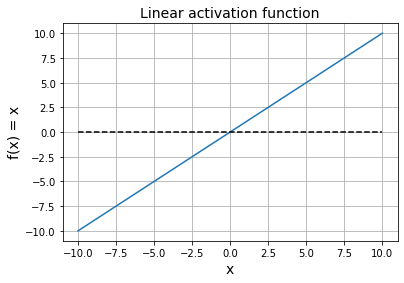

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10)
y = x

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = x', fontsize=14)
plt.title('Linear activation function', fontsize=14)
plt.plot(x, np.zeros(len(x)), '--k')
plt.show()

We can write this expression in a more concise way as

\begin{equation}
  \hat{y} = \bf{w} \cdot \bf{x}
\end{equation}

where $\bf{w}$ and $\bf{x}$ are vectors containing the model's parameters and input features respectively.

## Training a Perceptron

Our objective is to find the values of $\bf{w}$ that minimize a cost function, for linear regression we use the Mean Square Error (MSE).

\begin{equation}
  MSE(\hat{y},y)  = \frac{1}{N} \sum^{N}_{j=1} (\hat{y}^{(j)} - y^{(j)})^2
\end{equation}

where $N$ is the number of samples and $y^{(i)}$ is the ground truth of the $j^{th}$ sample in the dataset.

### Gradient Descent

Gradient descent is a general optimization technique based on the idea of tweaking the parameters iteratively in order to minimize a cost function.

![gd](https://miro.medium.com/max/600/1*iNPHcCxIvcm7RwkRaMTx1g.jpeg)

The algorithm goes as follows.

1. Compute the output of the model, $\hat{y}$.
2. Compute the gradient of the error with respect to the parameters, $\frac{\partial MSE}{\partial w} = \frac{2}{N} \frac{\partial \hat{y}}{\partial w} (\hat{y} - y) $ where $\frac{\partial \hat{y}}{\partial w} = x$.
3. Update the parameters, $w^{i+1} = w^i - \eta \frac{\partial MSE}{\partial w}$, where $\eta$ is the learning rate.
4. Repeat until convergence.

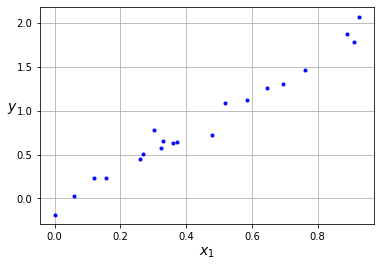

In [2]:
x = np.random.rand(20)
y = 2*x + (np.random.rand(20)-0.5)*0.5

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

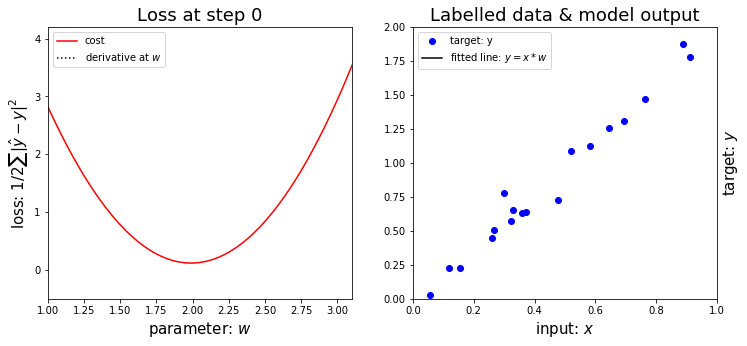

In [3]:
from matplotlib import animation, rc
rc('animation', html='html5')

def init_fig(x, t, ws, cost_ws):
    """Initialise figure"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    ax2.plot(x, t, 'bo', label='target: y')
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 2])
    ax2.set_xlabel('input: $x$', fontsize=15)
    ax2.set_ylabel('target: $y$', fontsize=15)
    ax2.yaxis.set_label_position('right')
    ax2.set_title('Labelled data & model output', fontsize=18)
    line2, = ax2.plot([], [], 'k-', label='fitted line: $y=x*w$')
    ax2.legend(loc=2)
    # Cost function plot
    ax1.plot(ws, cost_ws, 'r-', label='cost')
    ax1.set_ylim([-0.5, 4.2])
    ax1.set_xlim([1, 3.1])
    ax1.set_xlabel('parameter: $w$', fontsize=15)
    ax1.set_ylabel('loss: $1/2 \sum |\hat{y}-y|^2$', fontsize=15)
    cost_text = ax1.set_title('Loss at step {}'.format(0), fontsize=18)
    line1, = ax1.plot([], [], 'k:', label='derivative at $w$')
    pc_dots, = ax1.plot([], [], 'ko')
    ax1.legend(loc=2)
    return fig, ax1, ax2, line1, line2, pc_dots, cost_text

def get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights):
    """Return animation function."""
    xs = np.linspace(0, 4, num=100)  # weight values
    def anim(i):
        """Animate step i"""
        if i == 0:
            return [line1, line2, pc_dots, cost_text]
        (w, dw, cost) = weights[i-1]
        cost_text.set_text('Loss at step {} = {:.3f}'.format(i, cost))
        ws, _, cs = zip(*weights[0:i])
        pc_dots.set_xdata(ws)
        pc_dots.set_ydata(cs)
        abline_values = [dw * (x-w) + cost for x in xs]
        line1.set_xdata(xs)
        line1.set_ydata(abline_values)
        # Plot fit
        # plot the fitted line
        line2.set_xdata([0, 1])
        line2.set_ydata([0*w, 1*w])
        ax2.legend(loc=2)
        return [line1, line2, pc_dots, cost_text]
    return anim

def gradient(w, x, t): 
    return np.sum(x * (x*w - t))

def cost(y, t): 
  return (0.5*(t - y)**2).sum()

ws = np.linspace(0, 4, num=100)  
cost_ws = np.vectorize(lambda w: cost(x*w, y))(ws)  
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)

In [4]:
def compute_anim(w = 1, lr=0.01):
    epochs = 49
    weights = [(w, gradient(w, x, y), cost(x*w, y))]
    for i in range(epochs):
        dw = gradient(w, x, y)
        w = w - lr*dw
        weights.append((w, dw, cost(x*w, y)))

    animate = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)
    anim = animation.FuncAnimation(fig, animate, frames=len(weights)+1, interval=200, blit=True)
    plt.close()
    return anim
    
anim = compute_anim()
anim

Depending on the initialization and the learning rate, the convergence proccess will be faster, slower or divergent.

In [5]:
anim = compute_anim(w = 1.5)
anim

In [6]:
anim = compute_anim(w = 5)
anim

In [7]:
anim = compute_anim(w=1.5, lr = 0.45)
anim

In [8]:
anim = compute_anim(lr = 0.001)
anim

Depending on the data used to evaluate the gradients we distinguish between:

- Batch Gradient Descent: We use the entire dataset to compute gradients.
- Stochastic Gradient Descent: We use a random instance to evaluate the gradient.
- Mini-batch Gradient Descent: We use a small random set of instances to evaluate gradient (default choice).

In [9]:
w = 1
lr = 0.1
epochs = 3
weights = [(w, gradient(w, x, y), cost(x*w, y))]
N = x.shape[0]
ixs = np.arange(N)
for i in range(epochs):
    np.random.shuffle(ixs)
    for ix in ixs:
      _x, _y = x[ix], y[ix]
      dw = gradient(w, _x, _y)
      w = w - lr*dw
      weights.append((w, dw, cost(_x*w, _y)))

fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
animate = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)
anim = animation.FuncAnimation(fig, animate, frames=len(weights)+1, interval=200, blit=True)
plt.close()
anim

In [10]:
w = 1
lr = 0.01
epochs = 24
batch_size = 10
weights = [(w, gradient(w, x, y), cost(x*w, y))]
ixs = np.arange(x.shape[0])
batches = x.shape[0] // batch_size
for i in range(epochs):
    np.random.shuffle(ixs)
    for i in range(batches):
      _x, _y = x[ixs[i*batch_size:(i+1)*batch_size]], y[ixs[i*batch_size:(i+1)*batch_size]]
      dw = gradient(w, _x, _y)
      w = w - lr*dw
      weights.append((w, dw, cost(_x*w, _y)))
    
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
animate = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)
anim = animation.FuncAnimation(fig, animate, frames=len(weights)+1, interval=200, blit=True)
plt.close()
anim

Batch gradient descent can converge nicely to the minimum, but since it requires the entire dataset it is very slow (and sometimes impracticable). The alternatives converge more erratically, but faster. To adress this issue we normally use learning rate schedulers (decrease-increse learning rate during training).

![](https://i.stack.imgur.com/lU3sx.png)

## Classification

### Binary classification

We can use a perceptron to perform binary classification, say if one particular instance belongs to a particular class or not. For that we use a *step* activation function.


\begin{equation}
\hat{y} = \mathrm{step}(\mathbf{x}^T \mathbf{w}) = \mathrm{step}(w_0 + w_1 x_1 + ... + w_m x_m)
\end{equation}

where the step function sets the output to $0$ if $\mathbf{x}^T \mathbf{w} \leq 0$ or $1$ if $\mathbf{x}^T \mathbf{w} > 0$. 

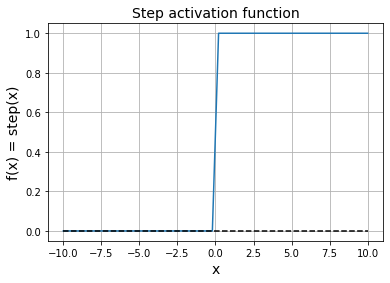

In [11]:
x = np.linspace(-10, 10)
y = x > 0

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = step(x)', fontsize=14)
plt.title('Step activation function', fontsize=14)
plt.plot(x, np.zeros(len(x)), '--k')
plt.show()

In [12]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
X_mean, X_std = X.mean(), X.std()
X_norm = (X - X_mean) / X_std

y = (iris.target == 0).astype(np.int)

In [13]:
class Perceptron():
  def __init__(self, size):
    self.w = np.random.randn(size) 
    self.ws = []
    
  def __call__(self, w, x):
    return w.dot(x.T) > 0 

  def fit(self, X, Y, epochs, lr):
    X = np.c_[np.ones(len(X)), X]
    for epoch in range(epochs):
      for x, y in zip(X, Y):    
        y_hat = self(self.w, x)  
        # loss function (MSE)
        l = 0.5*(y_hat - y)**2
        # derivatives
        dldh = (y_hat - y)
        dhdw = x
        dldw = dldh*dhdw
        # update
        self.w = self.w - lr*dldw
      # save weights for animation
      self.ws.append(self.w.copy())

In [14]:
perceptron = Perceptron(3)
epochs, lr = 20, 0.01
perceptron.fit(X_norm, y, epochs, lr)

In [15]:
from matplotlib import animation, rc
rc('animation', html='html5')

def plot(epoch, model, w, X, y, axes, label, line):
    ax.clear()
    tit = ax.set_title(f"Epoch {epoch+1}", fontsize=14)
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = (np.c_[x0.ravel(), x1.ravel()] - X_mean)/X_std
    X_new = np.c_[np.ones(len(X_new)), X_new] 
    y_predict = model(w, X_new)
    zz = y_predict.reshape(x0.shape)

    ax.plot(X[y==0, 0], X[y==0, 1], "bs", label=f"Not {label}")
    ax.plot(X[y==1, 0], X[y==1, 1], "yo", label=label)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

    ax.contourf(x0, x1, zz, cmap=custom_cmap)
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    return [tit]

def get_anim(fig, ax, model, X, y, axes = [0, 5, 0, 2], label="Iris-Setosa", line=True):
    def anim(i):
        return plot(i, model, model.ws[i], X, y, axes, label, line)
    return anim

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
animate = get_anim(fig, ax, perceptron, X, y)
anim = animation.FuncAnimation(fig, animate, frames=epochs, interval=200, blit=True)
plt.close()
anim

The perceptron is a linear classifier, therefore it will never get to the state with all the input vectors classified correctly if the training set is not linearly separable. 

In [16]:
X2 = X[iris.target != 0]
X2_norm = (X2 - X_mean) / X_std
y2 = (iris.target == 1).astype(np.int)[iris.target != 0]

perceptron = Perceptron(3)
epochs, lr = 50, 0.005
perceptron.fit(X2_norm, y2, epochs, lr)

In [17]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
animate = get_anim(fig, ax, perceptron, X2, y2, axes = [2.5, 7.5, 0.5, 2.8], label="Iris-Versicolor" )
anim = animation.FuncAnimation(fig, animate, frames=len(perceptron.ws), interval=100, blit=True)
plt.close()
anim

### Predicting Probabilities

We can use a perceptron to predict the probability of an instance to belong to a particular class. For that we use a *sigmoid* activation function:

\begin{equation}
  \hat{y} = \sigma(\mathbf{x}^T \mathbf{w})
\end{equation}

Where $\sigma(x) = \frac{1}{1 + e^{-x}}$ is the sigmoid function, that will limit the value of $\hat{y}$ between 0 and 1. We can interpret the output as a probability and assume that an instance belongs to a particular class if this probability is above a threshold (normally 0.5, but it can be tuned according to your precision-recall trade-off). This model is also known as linear regression.

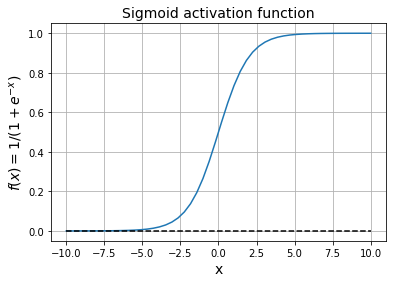

In [18]:
x = np.linspace(-10, 10)
y = 1. / (1. + np.exp(-x))

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('$f(x) = 1/(1 + e^{-x})$', fontsize=14)
plt.title('Sigmoid activation function', fontsize=14)
plt.plot(x, np.zeros(len(x)), '--k')
plt.show()

To train a logistic regression model we need a different loss function, called the *log loss* function.

\begin{equation}
  J(\mathbf{w}) = - \frac{1}{N} \sum^{N}_{j=1} \left[ y^{(j)} log(\hat{y}^{(j)}) + (1-y^{(j)})log(1-\hat{y}^{(j)})\right]
\end{equation}

There is no known close-form to minimize this function, but gradient descent is guaranteed to find the global minimum if the learning rate is not too large. For that we need the deravite of the cost function with respect to the model parameters

\begin{equation}
  \frac{\partial J}{\partial w_i} =  \frac{1}{N} \sum^{N}_{j=1} (\sigma(\mathbf{w} \cdot \mathbf{x}^{(i)}) - y^{(i)})x^{(j)}_i
\end{equation}

In [19]:
class LogisticRegression():
  def __init__(self, size):
    self.w = np.random.randn(size) 
    self.ws = []
    
  def __call__(self, w, x):
    return self.sigmoid(w.dot(x.T)) 

  def sigmoid(self, x):
    return 1. / (1. + np.exp(-x))

  def fit(self, X, Y, epochs, lr):
    X = np.c_[np.ones(len(X)), X]
    for epoch in range(epochs):
      for x, y in zip(X, Y):    
        y_hat = self(self.w, x)  
        # loss function (log loss)
        l = - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
        # derivatives
        dldh = (y_hat - y)
        dhdw = x
        dldw = dldh*dhdw
        # update
        self.w = self.w - lr*dldw
      # save weights for animation
      self.ws.append(self.w.copy())

In [20]:
X = iris.data[:, (2, 3)]  # petal length, petal width
X_norm = (X-X_mean)/X_std
y = (iris.target == 0).astype(np.int)

logisticRegression = LogisticRegression(3)
epochs, lr = 30, 0.01
logisticRegression.fit(X_norm, y, epochs, lr)

In [21]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
animate = get_anim(fig, ax, logisticRegression, X, y, line=False)
anim = animation.FuncAnimation(fig, animate, frames=epochs, interval=200, blit=True)
plt.close()
anim

In [22]:
logisticRegression = LogisticRegression(3)
epochs, lr = 50, 0.01
logisticRegression.fit(X2_norm, y2, epochs, lr)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
animate = get_anim(fig, ax, logisticRegression, X2, y2, axes = [2.5, 7.5, 0.5, 2.8], label="Iris-Versicolor" )
anim = animation.FuncAnimation(fig, animate, frames=epochs, interval=100, blit=True)
plt.close()
anim

### Multi-class classification

The logistic regression model can be generalized to support multiple classes. For that we use a Perceptron with multiple outputs (one for each class) and then apply a *softmax* activation function. This is called Softmax Regression. Given an instance, the model will assign a score to each class and then estimate a probability distribution.

\begin{equation}
  \hat{y} = \underset{k}{\arg\max} \ \ \sigma(\mathbf{w} \cdot \mathbf{x})_k
\end{equation}

where now $\sigma(t)_k = \frac{e^{t_k}}{\sum^K_{k=1} e^{t_k}}$ and $K$ is the number of classes and $t_k$ is the score of each class for the instance $\bf{x}$.


![](https://jleewebblog.files.wordpress.com/2017/03/sofmax-regression.jpg?w=633&h=527)



The loss function used for training softmax regression model is called *Cross entropy*

\begin{equation}
  J(\mathbf{w}) = - \frac{1}{N} \sum^N_{j=1} \sum^K_{k=1} y_k^{(j)} log(\hat{y}_k^{(j)})
\end{equation}

where $y_k^{(j)}$ is the probability that the $j^{th}$ instance belongs to class $k$ (usually 1 or 0). If $K=2$ the cost function is equivalent to the *log loss* cost function. The gradient of the cross entropy cost function is

\begin{equation}
  \frac{\partial J_k}{\partial \mathbf{w}} =  \frac{1}{N} \sum^{N}_{j=1} (\hat{y}_k^{(j)} - y_k^{(j)}) \mathbf{x}^{(j)}
\end{equation}

In [23]:
def crossentropy(output, target):
    logits = output[np.arange(len(output)),target]
    entropy = - logits + np.log(np.sum(np.exp(output),axis=-1))
    return entropy
  
def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=-1,keepdims=True)

def grad_crossentropy(output, target):
    answers = np.zeros_like(output)
    answers[np.arange(len(output)),target] = 1    
    return (- answers + softmax(output)) / output.shape[0]

class SoftmaxRegression():
  def __init__(self, inputs, outputs):
    self.w = np.random.randn(inputs, outputs)
    self.ws = []
        
  def fit(self, X, Y, epochs, lr):
    X = np.c_[np.ones(len(X)), X]
    for epoch in range(epochs):
      l = []
      for x, y in zip(X, Y):    
        # add batch dimension
        x = x[None, :]
        # compute output
        y_hat = np.dot(x, self.w)
        # compute loss
        loss = crossentropy(y_hat, y).mean()
        l.append(loss)        
        # Backprop to compute gradients of loss w.r.t w1, b1, w2, b2
        # d loss / d output
        dldo = grad_crossentropy(y_hat, y)        
        # d loss / d w2 = d loss / d output * d output / d w2
        grad_w = np.dot(x.T, dldo)
        # Update weights using gradient descent
        self.w = self.w - lr * grad_w
      self.ws.append(self.w.copy())                    
      if not epoch % 10 and not epoch == 0:
        print(f'Epoch: {epoch}, Loss: {np.mean(l):.8f}')
    print(f'Epoch: {epoch+1}, Loss: {np.mean(l):.8f}')
    
  def predict(self, x, w):
    x = np.c_[np.ones(len(x)), x]
    y_hat = np.dot(x, w)
    return np.argmax(softmax(y_hat), axis=1) 

In [24]:
X = iris.data[:, (2, 3)]  # petal length, petal width
X_mean, X_std = X.mean(), X.std()
X_norm = (X - X_mean) / X_std

y = iris.target

softmaxRegression = SoftmaxRegression(3, 3)
epochs, lr = 50, 0.05
softmaxRegression.fit(X_norm, y, epochs, lr)

Epoch: 10, Loss: 0.19056392
Epoch: 20, Loss: 0.14613381
Epoch: 30, Loss: 0.12612764
Epoch: 40, Loss: 0.11451598
Epoch: 50, Loss: 0.10750476


In [25]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(epoch, X, y, classifier, w, resolution=0.02):
    ax.clear()
    tit = ax.set_title(f"Epoch {epoch+1}", fontsize=14)
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    X_new = (np.array([xx1.ravel(), xx2.ravel()]) - X_mean)/X_std
    
    Z = classifier.predict(X_new.T, w)
    #print(Z)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    ax.set_xlabel('petal length', fontsize=14)
    ax.set_ylabel('petal width', fontsize=14)
    classes = ["Iris-Setosa", "Iris-Versicolor", "Iris-Virginica"]
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=classes[cl], 
                    edgecolor='black')
    ax.legend(loc='upper left', fontsize=14)
    return [tit]
        
def get_anim(fig, ax, X, y, model):
    def anim(i):
        return plot_decision_regions(i, X, y, model, model.ws[i])
    return anim

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
animate = get_anim(fig, ax, X, y, softmaxRegression)
anim = animation.FuncAnimation(fig, animate, frames=epochs, interval=100, blit=True)
plt.close()
anim

# Summary

- ANNs are inspired in biological NNs
- The perceptron computes a weighted sum of its inputs and applies an activation
- We can make different tasks depending on the activation and loss functions used
- We use Gradient Descent to find the set of parameters that minimize the loss
- Linear models have limitations with data that is not linearly separable